In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np

from Image import Images
from utils import show_analyze_result, decision_tree_result
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

In [2]:
i1 = Images('6070_2_3', 6)
i2 = Images('6090_2_0', 6)
i3 = Images('6100_2_2', 6)
i4 = Images('6110_4_0', 6)
i5 = Images('6160_2_1', 6)
tr_data1 = i1.get_all_tr_data()
tr_data2 = i2.get_all_tr_data()
tr_data3 = i3.get_all_tr_data()
tr_data4 = i4.get_all_tr_data()
tr_data5 = i5.get_all_tr_data()
labels1 = i1.mask_of(['7', '8'], False).flatten()
labels2 = i2.mask_of(['7', '8'], False).flatten()
labels3 = i3.mask_of(['7', '8'], False).flatten()
labels4 = i4.mask_of(['7', '8'], False).flatten()
labels5 = i5.mask_of(['7', '8'], False).flatten()

In [11]:
tr_data_all = np.vstack((tr_data1, tr_data3, tr_data5))
labels_all = np.hstack((labels1, labels3, labels5))

In [12]:
pca = PCA(n_components = 5)
tr_data_all_pca = pca.fit_transform(tr_data_all)

In [13]:
#clf = tree.DecisionTreeClassifier(max_depth = 8)
clf = RandomForestClassifier(max_depth = 9, n_estimators=12)
clf = clf.fit(tr_data_all_pca, labels_all)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)               2792               2174  56.22%
1  NEGATIVE (TRUTH)               3168             307694  98.98%
2               REL             46.85%             99.30%       -
Average accuracy: 77.60%
Average reliability: 73.07%
Overall accuracy: 98.31%


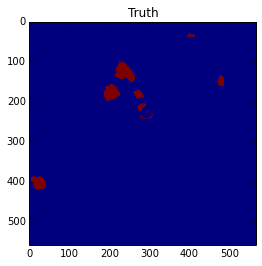

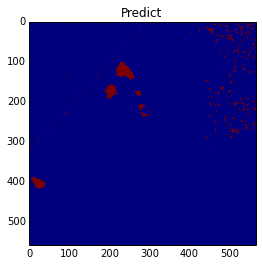

In [14]:
result4 = decision_tree_result(i4, clf.predict(pca.transform(tr_data4)), labels4)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)                410               1034  28.39%
1  NEGATIVE (TRUTH)                822             313004  99.74%
2               REL             33.28%             99.67%       -
Average accuracy: 64.07%
Average reliability: 66.47%
Overall accuracy: 99.41%


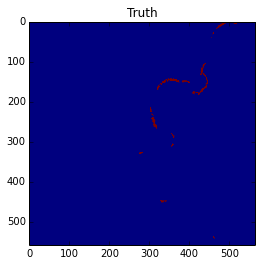

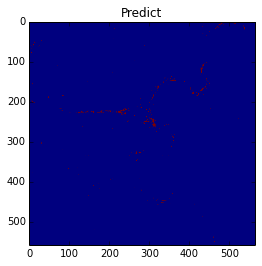

In [15]:
result2 = decision_tree_result(i2, clf.predict(pca.transform(tr_data2)), labels2)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)               4869               2388  67.09%
1  NEGATIVE (TRUTH)               1896             306117  99.38%
2               REL             71.97%             99.23%       -
Average accuracy: 83.24%
Average reliability: 85.60%
Overall accuracy: 98.64%


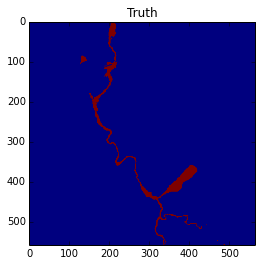

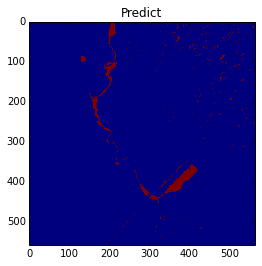

In [16]:
result3 = decision_tree_result(i3, clf.predict(pca.transform(tr_data3)), labels3)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)              24698              10875  69.43%
1  NEGATIVE (TRUTH)                504             274171  99.82%
2               REL             98.00%             96.18%       -
Average accuracy: 84.62%
Average reliability: 97.09%
Overall accuracy: 96.33%


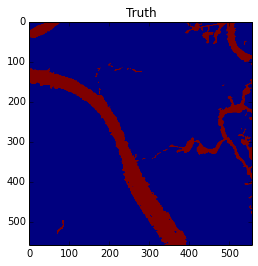

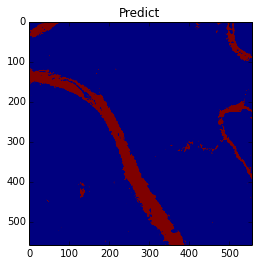

In [17]:
result1 = decision_tree_result(i1, clf.predict(pca.transform(tr_data1)), labels1)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)                  0                  0       -
1  NEGATIVE (TRUTH)                 35             315235  99.99%
2               REL              0.00%            100.00%       -
Average accuracy: -
Average reliability: 50.00%
Overall accuracy: 99.99%


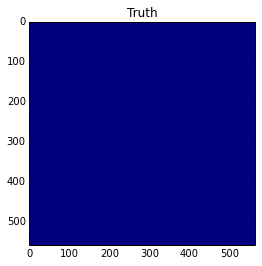

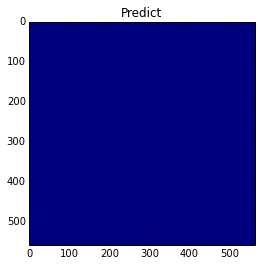

In [18]:
result5 = decision_tree_result(i5, clf.predict(pca.transform(tr_data5)), labels5)